In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import roc_auc_score
import keras
from pprint import pprint
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

Using TensorFlow backend.


In [2]:
N=4000000. #Change this line adjust the number of rows. 
data=pd.read_csv("HIGGS.csv",nrows=N,header=None)
test_data=pd.read_csv("HIGGS.csv",nrows=500000,header=None,skiprows=10500000)

In [3]:
#column names from http://archive.ics.uci.edu/ml/datasets/HIGGS
data.columns=['label','lepton pt','lepton eta','lepton phi','missing energy magnitude','missing energy phi',
              'jet 1 pt','jet 1 eta','jet 1 phi','jet 1 b-tag','jet 2 pt','jet 2 eta','jet 2 phi','jet 2 b-tag',
              'jet 3 pt','jet 3 eta','jet 3 phi','jet 3 b-tag','jet 4 pt','jet 4 eta','jet 4 phi','jet 4 b-tag',
              'm_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']
test_data.columns=['label','lepton pt','lepton eta','lepton phi','missing energy magnitude','missing energy phi',
              'jet 1 pt','jet 1 eta','jet 1 phi','jet 1 b-tag','jet 2 pt','jet 2 eta','jet 2 phi','jet 2 b-tag',
              'jet 3 pt','jet 3 eta','jet 3 phi','jet 3 b-tag','jet 4 pt','jet 4 eta','jet 4 phi','jet 4 b-tag',
              'm_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 29 columns):
label                       float64
lepton pt                   float64
lepton eta                  float64
lepton phi                  float64
missing energy magnitude    float64
missing energy phi          float64
jet 1 pt                    float64
jet 1 eta                   float64
jet 1 phi                   float64
jet 1 b-tag                 float64
jet 2 pt                    float64
jet 2 eta                   float64
jet 2 phi                   float64
jet 2 b-tag                 float64
jet 3 pt                    float64
jet 3 eta                   float64
jet 3 phi                   float64
jet 3 b-tag                 float64
jet 4 pt                    float64
jet 4 eta                   float64
jet 4 phi                   float64
jet 4 b-tag                 float64
m_jj                        float64
m_jjj                       float64
m_lv                   

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 29 columns):
label                       500000 non-null float64
lepton pt                   500000 non-null float64
lepton eta                  500000 non-null float64
lepton phi                  500000 non-null float64
missing energy magnitude    500000 non-null float64
missing energy phi          500000 non-null float64
jet 1 pt                    500000 non-null float64
jet 1 eta                   500000 non-null float64
jet 1 phi                   500000 non-null float64
jet 1 b-tag                 500000 non-null float64
jet 2 pt                    500000 non-null float64
jet 2 eta                   500000 non-null float64
jet 2 phi                   500000 non-null float64
jet 2 b-tag                 500000 non-null float64
jet 3 pt                    500000 non-null float64
jet 3 eta                   500000 non-null float64
jet 3 phi                   500000 non-null float64
jet 3

In [6]:
colnames=list(data.columns.values)
colnames

['label',
 'lepton pt',
 'lepton eta',
 'lepton phi',
 'missing energy magnitude',
 'missing energy phi',
 'jet 1 pt',
 'jet 1 eta',
 'jet 1 phi',
 'jet 1 b-tag',
 'jet 2 pt',
 'jet 2 eta',
 'jet 2 phi',
 'jet 2 b-tag',
 'jet 3 pt',
 'jet 3 eta',
 'jet 3 phi',
 'jet 3 b-tag',
 'jet 4 pt',
 'jet 4 eta',
 'jet 4 phi',
 'jet 4 b-tag',
 'm_jj',
 'm_jjj',
 'm_lv',
 'm_jlv',
 'm_bb',
 'm_wbb',
 'm_wwbb']

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


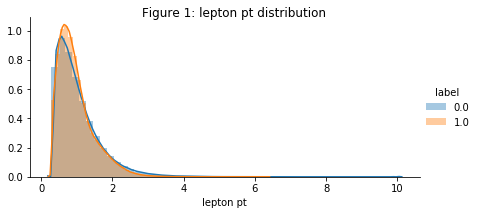

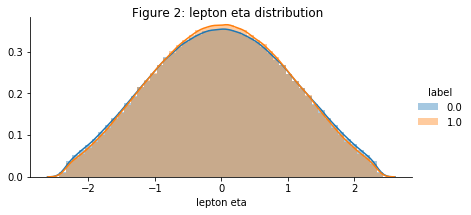

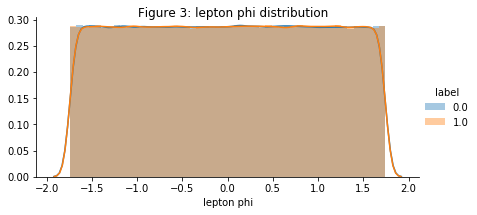

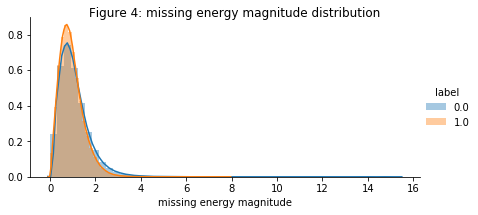

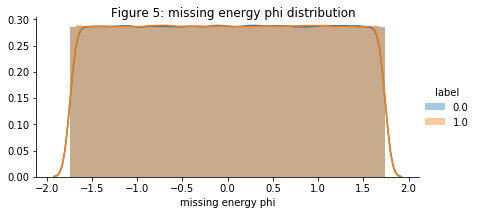

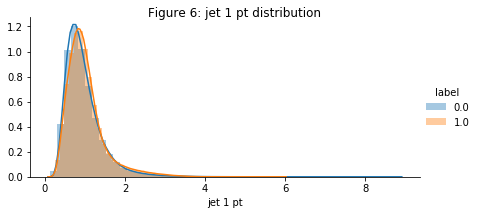

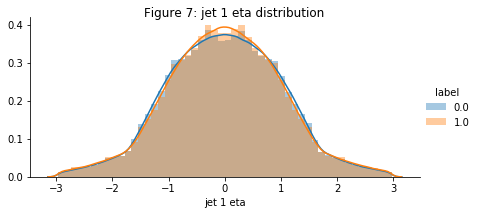

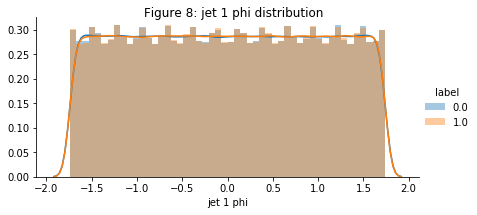

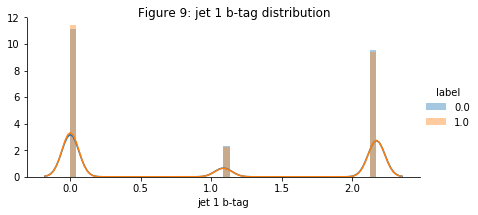

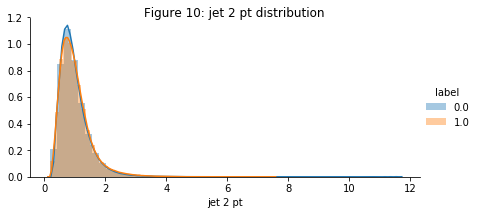

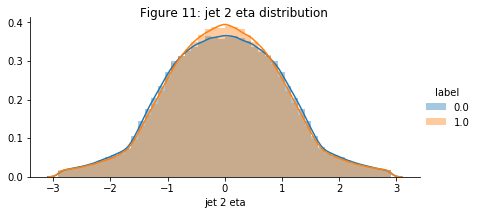

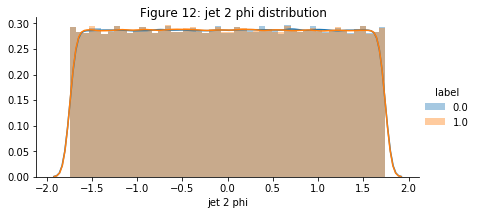

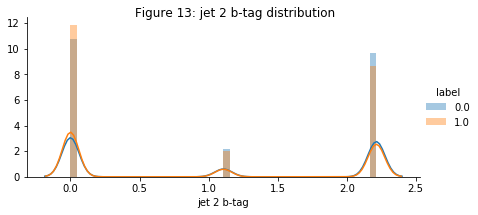

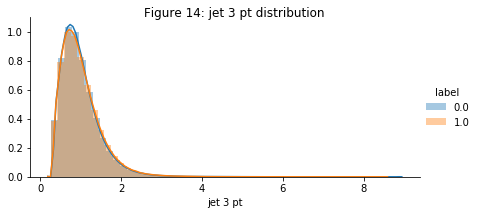

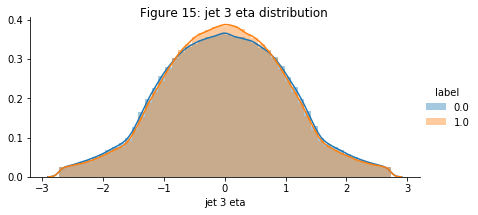

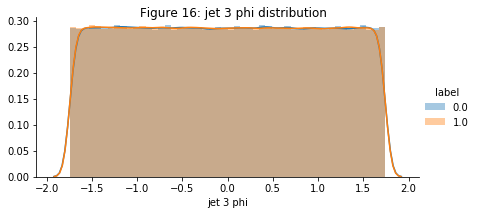

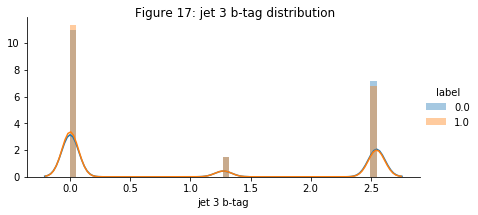

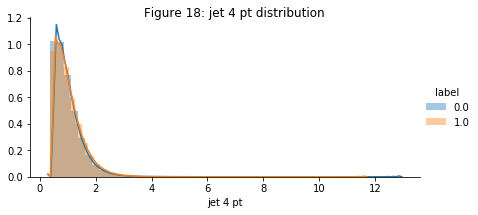

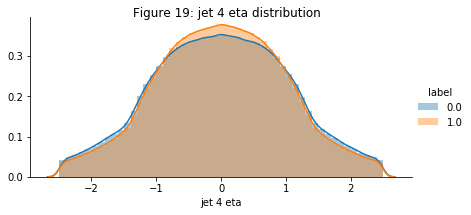

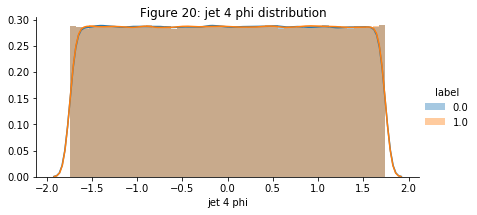

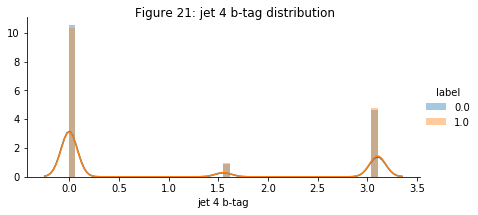

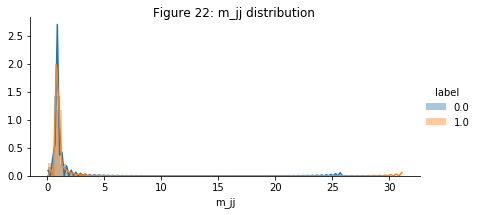

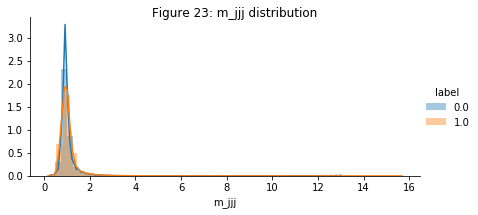

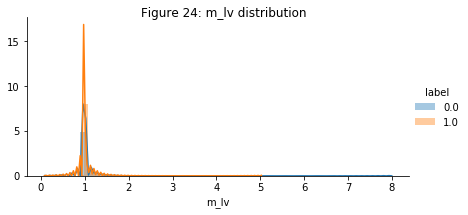

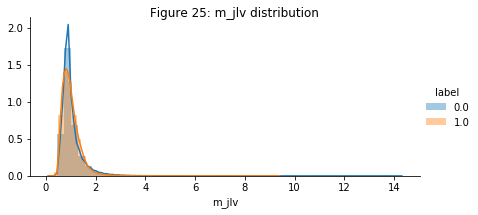

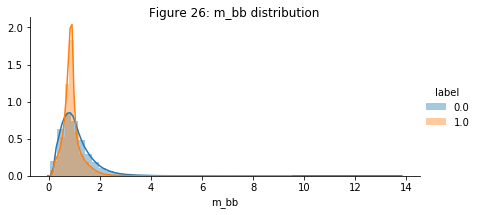

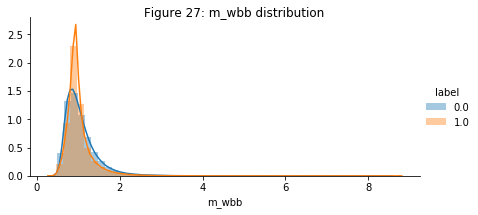

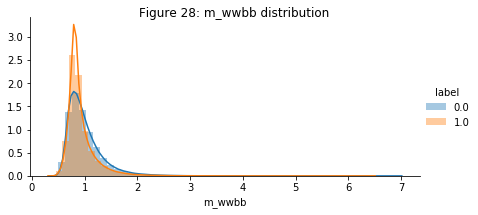

In [32]:
# plotting the distributions shows us that there are uniform, normal, and skewed distributions

for i in colnames[1:]:
    facet = sns.FacetGrid(data, hue='label',aspect=2).set_titles(i)
    facet.map(sns.distplot,i)
    facet.add_legend()
    facet.fig.suptitle(''.join(map(str, list(["Figure ",colnames.index(i),": ",i," distribution"]))))
    plt.show()

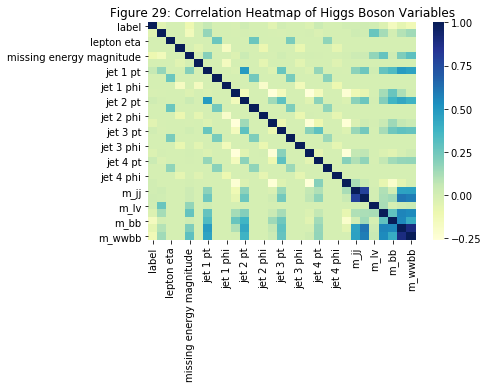

In [7]:
# most of the variables are weakly correlated apart from the last 5 or 7
ax = plt.axes()
sns.heatmap(data.corr(), cmap="YlGnBu", ax = ax)
ax.set_title('Figure 29: Correlation Heatmap of Higgs Boson Variables')
plt.show()

In [8]:
assert not ((data["label"]>0)&(data["label"]<1)).sum()

y = np.array(data.iloc[:,0])
x = np.array(data.iloc[:,1:])
x_test = np.array(test_data.iloc[:,1:])
y_test = np.array(test_data.iloc[:,0])

In [9]:
# the target (y) has a mean of close to .5 meaning it's well balanced between 0 and 1
y.mean()

0.5297905

## Q1


In [10]:
#Begin 
# 1 layer (prof code)
model1 = Sequential()
model1.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model1.add(Activation('sigmoid'))
model1.add(Dropout(0.10))
model1.add(Dense(50, kernel_initializer='uniform'))
model1.add(Activation('sigmoid'))
model1.add(Dropout(0.10))
model1.add(Dense(1, kernel_initializer='uniform')) 
model1.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model1.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model1.predict(x_test))
#end

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
4000000/4000000 [==============================] - 12s 3us/step - loss: 0.6901 - acc: 0.5333
Epoch 2/5
4000000/4000000 [==============================] - 12s 3us/step - loss: 0.6464 - acc: 0.6179
Epoch 3/5
4000000/4000000 [==============================] - 12s 3us/step - loss: 0.6247 - acc: 0.6456
Epoch 4/5
4000000/4000000 [==============================] - 12s 3us/step - loss: 0.6104 - acc: 0.6636
Epoch 5/5
4000000/4000000 [==============================] - 12s 3us/step - loss: 0.6009 - acc: 0.6738


0.7540647645414595

In [31]:
#Begin 
# 2 layers 
model2 = Sequential()
model2.add(Dense(50, input_dim=x.shape[1], kernel_initializer='uniform')) # X_train.shape[1] == 28 here
model2.add(Activation('sigmoid'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('sigmoid'))
model2.add(Dropout(0.10))
model2.add(Dense(50, kernel_initializer='uniform'))
model2.add(Activation('sigmoid'))
model2.add(Dropout(0.10))
model2.add(Dense(1, kernel_initializer='uniform')) 
model2.add(Activation('sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

model2.fit(x, y, epochs=5, batch_size=1000)
roc_auc_score(y_test,model2.predict(x_test))
#end

Epoch 1/5
4000000/4000000 [==============================] - 14s 4us/step - loss: 0.6918 - acc: 0.5288
Epoch 2/5
4000000/4000000 [==============================] - 14s 4us/step - loss: 0.6917 - acc: 0.5294
Epoch 3/5
4000000/4000000 [==============================] - 14s 4us/step - loss: 0.6916 - acc: 0.5297
Epoch 4/5
4000000/4000000 [==============================] - 14s 4us/step - loss: 0.6915 - acc: 0.5298
Epoch 5/5
4000000/4000000 [==============================] - 14s 4us/step - loss: 0.6914 - acc: 0.5298


0.5962863804294168